In [398]:
import numpy as np
import pandas as pd

In [399]:
df = pd.read_csv('../DT/ATTRITION_MOD_FINAL2 (1).csv') #Leemos el DataFrame
df

id_employee               name involvement  performance environment  \
0              2      Brittany Dunn      Medium  Outstanding        High   
1              7         Samuel Kim        High  Outstanding         Low   
2             14         Jerry Rose      Medium    Excellent         Low   
3             29       Curtis Brown      Medium    Excellent   Very High   
4             31    Mr. Kyle Ramsey      Medium    Excellent         Low   
..           ...                ...         ...          ...         ...   
706         4382   Christine Porter        High  Outstanding        High   
707         4387  Christopher Chang      Medium  Outstanding        High   
708         4389         Aaron Wade        High    Excellent         Low   
709         4392        Jay Anthony        High    Excellent   Very High   
710         4403     Joseph Frazier        High    Excellent         Low   

     satisfaction  life_balance  age  travel              department  ...  \
0               4             2   31       0  Research & Development  ...   
1               1             1   28       2  Research & Development  ...   
2               3             4   47       0  Research & Development  ...   
3               1             3   44       2  Research & Development  ...   
4               3             2   26       2  Research & Development  ...   
..            ...           ...  ...     ...                     ...  ...   
706             3             2   29       0  Research & Development  ...   
707             4             2   33       0                   Sales  ...   
708             4             2   33       0                   Sales  ...   
709             4             1   32       2                   Sales  ...   
710             1             1   37       0                   Sales  ...   

     marital_status       income previous_companies salary_hike  stock_option  \
0                 2  1842.281167                  0          23             0   
1                 3  1554.950663                  2          20             0   
2                 3  2209.453581                  1          11             2   
3                 2  1613.341369                  3          14             0   
4                 2  1725.045093                  2          11             0   
..              ...          ...                ...         ...           ...   
706               3  1373.336870                  1          21             0   
707               1  1771.776127                  5          21             2   
708               3  2065.899204                  7          11             1   
709               2  1440.562334                  0          11             0   
710               2  1798.397878                  6          11             1   

    total_working_years  training_ly  years_company  last_promotion  \
0                     6            3              5               1   
1                     5            2              0               0   
2                    10            4             10               9   
3                    19            2              1               0   
4                     5            5              3               0   
..                  ...          ...            ...             ...   
706                   4            2              4               0   
707                   8            2              5               0   
708                  13            2              9               1   
709                   4            2              3               1   
710                  17            2              1               0   

     years_curr_manager  
0                     4  
1                     0  
2                     9  
3                     0  
4                     2  
..                  ...  
706                   1  
707                   4  
708                   7  
709                   2  
710                   0  

[711 rows x 26 columns]

In [400]:
mape = {'Low': 0, 'Medium': 1, 'High': 2, 'Very High': 3}
mape_2 = {'Outstanding': 0, 'Excellent': 1}
# mape_3 = {'Bad': 0, 'Better': 1, 'Good': 2, 'Best': 3}
# mape_4 = {'No': 0, 'Yes': 1}
# mape_5 = {'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2}
mape_6 = {'Sales': 0, 'Research & Development': 1, 'Human Resources': 2}
mape_7 = {'Female': 0, 'Male': 1}
mape_8 = {'Healthcare Representative': 0, 'Research Scientist': 1, 'Sales Executive': 2, 'Human Resources': 3,
          'Research Director': 4, 'Laboratory Technician': 5, 'Manufacturing Director': 6, 'Sales Representative': 7,
          'Manager': 8}     #Cambiamos todos los valores que sean 'string' a una escala con numeros 
                            # para que podamos predecir mejor 

df['involvement'] = df['involvement'].map(mape)
df['performance'] = df['performance'].map(mape_2)
df['environment'] = df['environment'].map(mape)
# df['satisfaction'] = df['satisfaction'].map(mape)
# df['life_balance'] = df['life_balance'].map(mape_3)
# df['attrition'] = df['attrition'].map(mape_4)
# df['travel'] = df['travel'].map(mape_5)
df['department'] = df['department'].map(mape_6)
df['gender'] = df['gender'].map(mape_7)
df['role'] = df['role'].map(mape_8)

In [401]:
df      #Miramos el DataFrame

id_employee               name  involvement  performance  environment  \
0              2      Brittany Dunn            1            0          2.0   
1              7         Samuel Kim            2            0          0.0   
2             14         Jerry Rose            1            1          0.0   
3             29       Curtis Brown            1            1          3.0   
4             31    Mr. Kyle Ramsey            1            1          0.0   
..           ...                ...          ...          ...          ...   
706         4382   Christine Porter            2            0          2.0   
707         4387  Christopher Chang            1            0          2.0   
708         4389         Aaron Wade            2            1          0.0   
709         4392        Jay Anthony            2            1          3.0   
710         4403     Joseph Frazier            2            1          0.0   

     satisfaction  life_balance  age  travel  department  ...  marital_status  \
0               4             2   31       0           1  ...               2   
1               1             1   28       2           1  ...               3   
2               3             4   47       0           1  ...               3   
3               1             3   44       2           1  ...               2   
4               3             2   26       2           1  ...               2   
..            ...           ...  ...     ...         ...  ...             ...   
706             3             2   29       0           1  ...               3   
707             4             2   33       0           0  ...               1   
708             4             2   33       0           0  ...               3   
709             4             1   32       2           0  ...               2   
710             1             1   37       0           0  ...               2   

          income previous_companies  salary_hike  stock_option  \
0    1842.281167                  0           23             0   
1    1554.950663                  2           20             0   
2    2209.453581                  1           11             2   
3    1613.341369                  3           14             0   
4    1725.045093                  2           11             0   
..           ...                ...          ...           ...   
706  1373.336870                  1           21             0   
707  1771.776127                  5           21             2   
708  2065.899204                  7           11             1   
709  1440.562334                  0           11             0   
710  1798.397878                  6           11             1   

     total_working_years  training_ly  years_company  last_promotion  \
0                      6            3              5               1   
1                      5            2              0               0   
2                     10            4             10               9   
3                     19            2              1               0   
4                      5            5              3               0   
..                   ...          ...            ...             ...   
706                    4            2              4               0   
707                    8            2              5               0   
708                   13            2              9               1   
709                    4            2              3               1   
710                   17            2              1               0   

     years_curr_manager  
0                     4  
1                     0  
2                     9  
3                     0  
4                     2  
..                  ...  
706                   1  
707                   4  
708                   7  
709                   2  
710                   0  

[711 rows x 26 columns]

In [402]:
df.isnull().any()       #Miramos si hay algún valor nulo

id_employee            False
name                   False
involvement            False
performance            False
environment             True
satisfaction           False
life_balance           False
age                    False
travel                 False
department             False
distance_home          False
education              False
education_field        False
gender                 False
job_level              False
role                   False
marital_status         False
income                 False
previous_companies     False
salary_hike            False
stock_option           False
total_working_years    False
training_ly            False
years_company          False
last_promotion         False
years_curr_manager     False
dtype: bool

In [403]:
df['environment'] = df['environment'].fillna(df['environment'].mean())  #Rellenamos los valores nulos de la 
                                                                        # columna 'environment' con la media
                                                                        # general de la columna

In [404]:
df['environment'] = df['environment'].astype('int64')   #Cambiamos el tipo de la columna 'environment' de
                                                        # 'float64' a 'int64'

In [405]:
df['years_company'] = df['years_company'] * 12      #Multiplicamos los años en la empresa por 12 para que 
                                                    # tengamos valores en meses

In [406]:
df['years_company'] = df['years_company'].replace(0, 6) #Cambiamos los valores 0 para seis para que tengamos
                                                        # un modelo mejor

In [407]:
df  #Miramos el DataFrame

id_employee               name  involvement  performance  environment  \
0              2      Brittany Dunn            1            0            2   
1              7         Samuel Kim            2            0            0   
2             14         Jerry Rose            1            1            0   
3             29       Curtis Brown            1            1            3   
4             31    Mr. Kyle Ramsey            1            1            0   
..           ...                ...          ...          ...          ...   
706         4382   Christine Porter            2            0            2   
707         4387  Christopher Chang            1            0            2   
708         4389         Aaron Wade            2            1            0   
709         4392        Jay Anthony            2            1            3   
710         4403     Joseph Frazier            2            1            0   

     satisfaction  life_balance  age  travel  department  ...  marital_status  \
0               4             2   31       0           1  ...               2   
1               1             1   28       2           1  ...               3   
2               3             4   47       0           1  ...               3   
3               1             3   44       2           1  ...               2   
4               3             2   26       2           1  ...               2   
..            ...           ...  ...     ...         ...  ...             ...   
706             3             2   29       0           1  ...               3   
707             4             2   33       0           0  ...               1   
708             4             2   33       0           0  ...               3   
709             4             1   32       2           0  ...               2   
710             1             1   37       0           0  ...               2   

          income previous_companies  salary_hike  stock_option  \
0    1842.281167                  0           23             0   
1    1554.950663                  2           20             0   
2    2209.453581                  1           11             2   
3    1613.341369                  3           14             0   
4    1725.045093                  2           11             0   
..           ...                ...          ...           ...   
706  1373.336870                  1           21             0   
707  1771.776127                  5           21             2   
708  2065.899204                  7           11             1   
709  1440.562334                  0           11             0   
710  1798.397878                  6           11             1   

     total_working_years  training_ly  years_company  last_promotion  \
0                      6            3             60               1   
1                      5            2              6               0   
2                     10            4            120               9   
3                     19            2             12               0   
4                      5            5             36               0   
..                   ...          ...            ...             ...   
706                    4            2             48               0   
707                    8            2             60               0   
708                   13            2            108               1   
709                    4            2             36               1   
710                   17            2             12               0   

     years_curr_manager  
0                     4  
1                     0  
2                     9  
3                     0  
4                     2  
..                  ...  
706                   1  
707                   4  
708                   7  
709                   2  
710                   0  

[711 rows x 26 columns]

In [408]:
df_original = df.copy() #Hacemos una copia del DtaFrame ahora que los datos ya estan listos
df_original

id_employee               name  involvement  performance  environment  \
0              2      Brittany Dunn            1            0            2   
1              7         Samuel Kim            2            0            0   
2             14         Jerry Rose            1            1            0   
3             29       Curtis Brown            1            1            3   
4             31    Mr. Kyle Ramsey            1            1            0   
..           ...                ...          ...          ...          ...   
706         4382   Christine Porter            2            0            2   
707         4387  Christopher Chang            1            0            2   
708         4389         Aaron Wade            2            1            0   
709         4392        Jay Anthony            2            1            3   
710         4403     Joseph Frazier            2            1            0   

     satisfaction  life_balance  age  travel  department  ...  marital_status  \
0               4             2   31       0           1  ...               2   
1               1             1   28       2           1  ...               3   
2               3             4   47       0           1  ...               3   
3               1             3   44       2           1  ...               2   
4               3             2   26       2           1  ...               2   
..            ...           ...  ...     ...         ...  ...             ...   
706             3             2   29       0           1  ...               3   
707             4             2   33       0           0  ...               1   
708             4             2   33       0           0  ...               3   
709             4             1   32       2           0  ...               2   
710             1             1   37       0           0  ...               2   

          income previous_companies  salary_hike  stock_option  \
0    1842.281167                  0           23             0   
1    1554.950663                  2           20             0   
2    2209.453581                  1           11             2   
3    1613.341369                  3           14             0   
4    1725.045093                  2           11             0   
..           ...                ...          ...           ...   
706  1373.336870                  1           21             0   
707  1771.776127                  5           21             2   
708  2065.899204                  7           11             1   
709  1440.562334                  0           11             0   
710  1798.397878                  6           11             1   

     total_working_years  training_ly  years_company  last_promotion  \
0                      6            3             60               1   
1                      5            2              6               0   
2                     10            4            120               9   
3                     19            2             12               0   
4                      5            5             36               0   
..                   ...          ...            ...             ...   
706                    4            2             48               0   
707                    8            2             60               0   
708                   13            2            108               1   
709                    4            2             36               1   
710                   17            2             12               0   

     years_curr_manager  
0                     4  
1                     0  
2                     9  
3                     0  
4                     2  
..                  ...  
706                   1  
707                   4  
708                   7  
709                   2  
710                   0  

[711 rows x 26 columns]

In [409]:
columnas_remover = ['id_employee', 'name', 'education', 'education_field']

df_original = df_original.drop(columnas_remover, axis=1)    #Removemos las columnas que no nos interesan

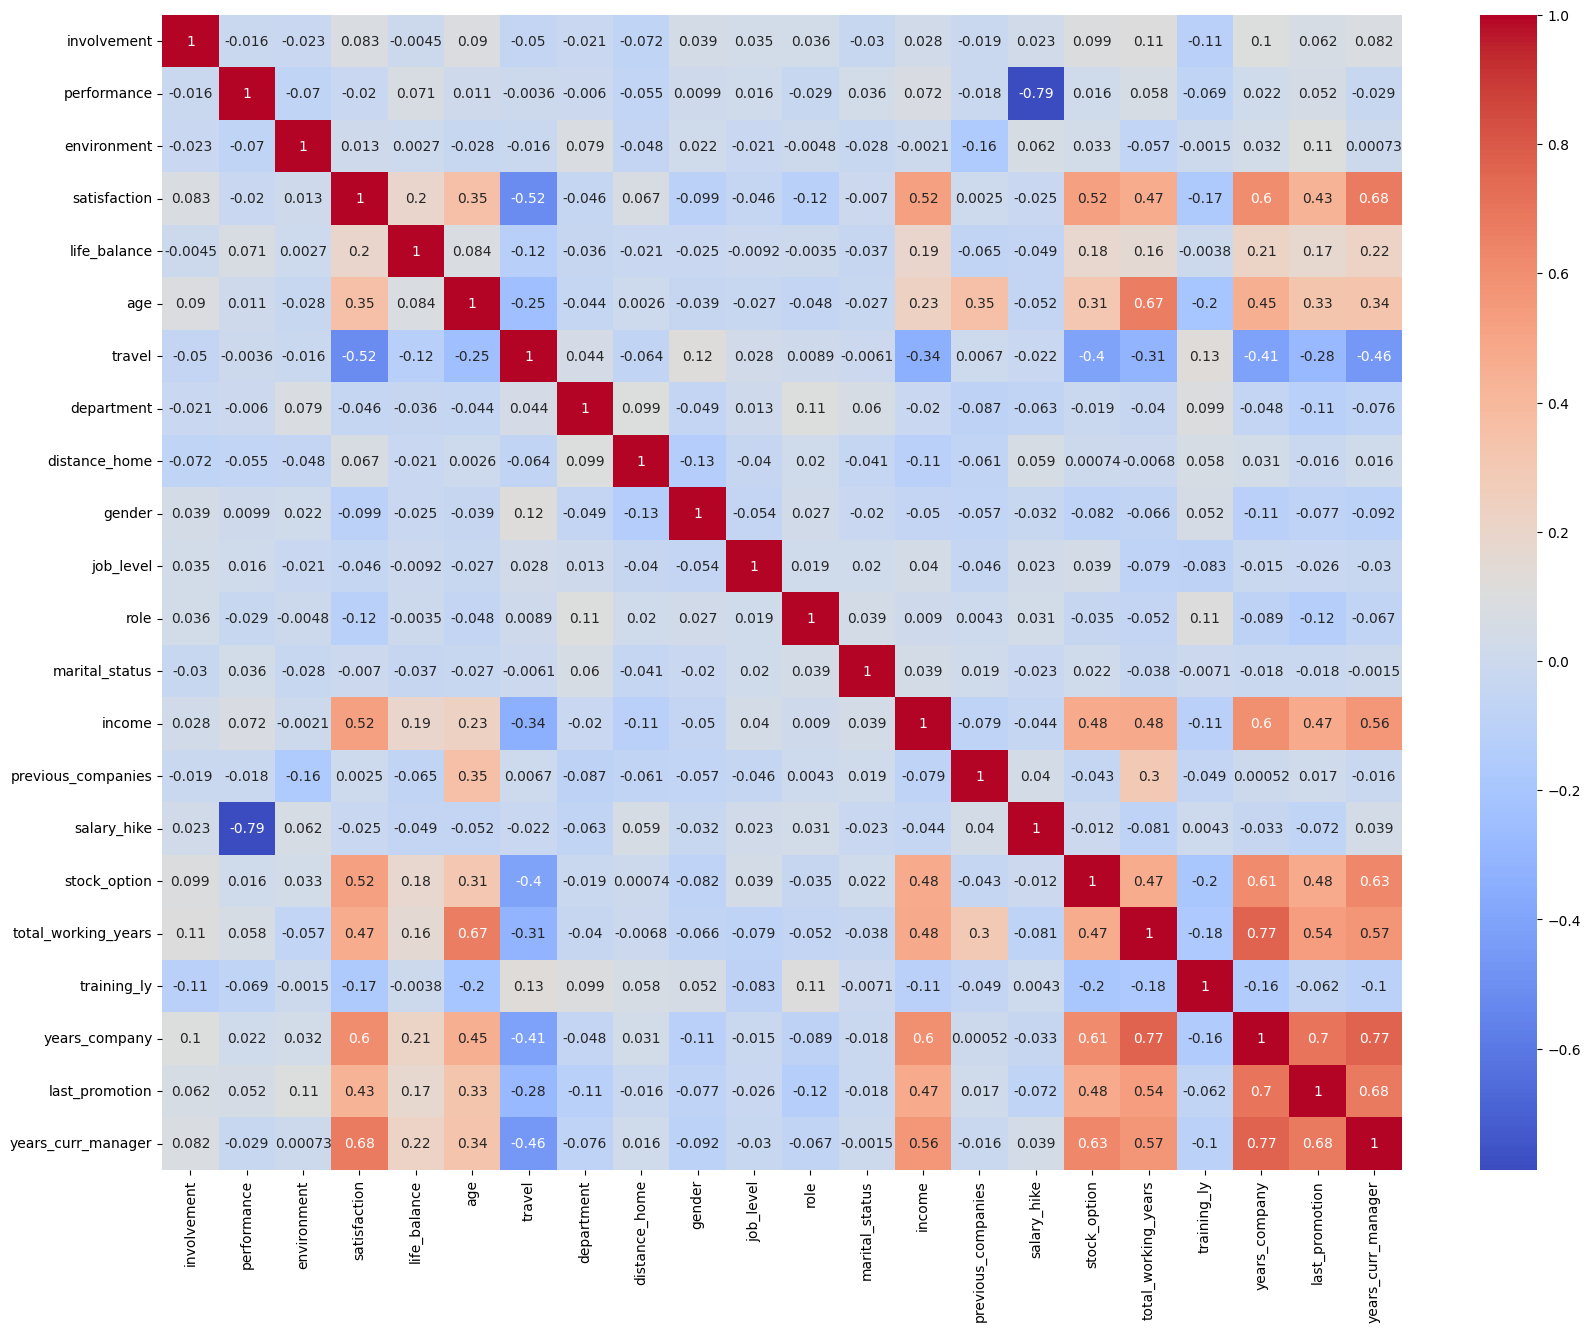

In [410]:
import seaborn as sns
import matplotlib.pyplot as plt

matriz_corr = df_original.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm')      #Miramos a todas las variables y sus relaciones

plt.show()

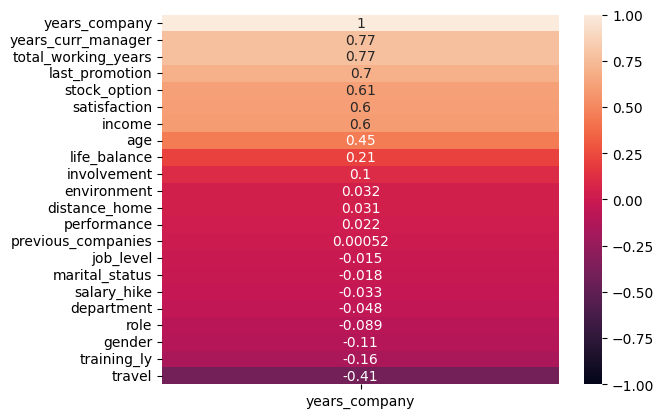

In [411]:
import seaborn as sns
import matplotlib.pyplot as plt     #Miramos todas las variables en relación al target

sns.heatmap(df_original.corr()[['years_company']].sort_values(by='years_company', ascending=False), vmin=-1, vmax=1, annot=True, annot_kws={"size":10});

In [412]:
from sklearn.model_selection import train_test_split

X = df_original[['involvement', 'performance', 'environment', 'satisfaction',
       'life_balance', 'age', 'travel', 'department', 'distance_home',
       'job_level', 'role', 'income',
       'total_working_years', 'last_promotion',         #Separamos las variables para entrenar el modelo
       'years_curr_manager']]
y = df_original['years_company']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Linear Regression

In [413]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
                                                    #Aplicamos un modelo de Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [414]:
y_pred = model.predict(X_test)      #Predecimos nuestro target

In [415]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

mse = mean_squared_error(y_test, y_pred)            #Avaliamos nuestro modelo
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}') 
print(f'Root Mean Squared Error: {rmse}')

Mean Squared Error: 842.3626152273911
R2 Score: 0.784205543444026
Root Mean Squared Error: 29.023483857514265


In [416]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(model, X_test, y_test, cv=5)    #Avaliamos el Cross Validation de nuestro modelo

print(f'Score: {score}')
print(f'Score (Media): {score.mean()}')

Score: [0.74336765 0.71238857 0.79049079 0.90903939 0.75588124]
Score (Media): 0.7822335288247203


In [418]:
print(y_pred)   #Miramos a las predicciones

[ 4.71982275e+01  3.90489797e+01  1.13611387e+02  7.28311104e+01
  6.86653775e+01  6.57155532e+01 -3.77912405e+00  5.18419349e+01
  1.98096959e+01  7.73418592e+01 -1.25284782e+01  2.06209357e+02
  1.39564849e+02  4.10645977e+01  9.26967460e+01  5.44251754e+01
  5.03907955e+01  4.25345117e+00  2.87434625e+01  1.88949292e+02
  1.56911203e+02  1.66668801e+01  2.16643536e+01  1.02086842e+02
  2.65046783e+02  3.14131464e+01 -1.72621976e+00  8.18012749e+00
  1.07166499e+02  5.24780600e+01  1.35435688e+02 -1.79012714e+01
  4.93185993e+01  5.37630488e-02  5.18780940e+01  3.41213900e+01
  1.82815261e+02  1.40887594e+02  1.82195266e+02  3.65376249e+01
 -5.79286567e+00  1.20689669e+01  4.62674123e+01  3.14329285e+01
  2.00603208e+01 -1.15307382e+01  1.54484789e-01  2.05556426e+02
  1.10869904e+02  9.28802666e+00  1.23952846e+02  4.18218050e+01
  3.15350159e+01  7.73068798e+01  3.44914791e+01  7.52337350e+01
  9.82702002e+01  4.42806100e+01  1.06831124e+02  5.57198979e+00
 -2.60703971e+01  4.77892

In [419]:
lista_pred = list(y_pred)   #Hacemos una lista con las predicciones
lista_pred

[47.19822747075081,
 39.048979738639204,
 113.6113873210695,
 72.83111040578775,
 68.66537749265672,
 65.71555317715553,
 -3.779124049956465,
 51.84193489967333,
 19.809695881668986,
 77.34185924824395,
 -12.528478249093233,
 206.20935670263327,
 139.5648488129649,
 41.064597664293174,
 92.69674600792213,
 54.425175390492754,
 50.390795482974866,
 4.253451172808667,
 28.74346246159392,
 188.94929172138052,
 156.911203483963,
 16.66688009180281,
 21.664353564119736,
 102.08684221257236,
 265.04678281075763,
 31.413146388544718,
 -1.7262197591599175,
 8.180127485036351,
 107.16649931922647,
 52.478060038520354,
 135.4356880246433,
 -17.901271415450132,
 49.318599262139216,
 0.053763048790187895,
 51.87809401293856,
 34.12138995199497,
 182.81526071355626,
 140.88759364358384,
 182.1952664868262,
 36.53762489981072,
 -5.792865672194139,
 12.06896687738238,
 46.267412280230516,
 31.43292848076898,
 20.060320780473816,
 -11.530738204066786,
 0.15448478916813002,
 205.55642637418748,
 110.86

In [420]:
lista_pred = [int(valor) for valor in lista_pred] #Pasamos todos los valores de la lista a 'int'

In [421]:
print(lista_pred)   #Miramos la lista 

[47, 39, 113, 72, 68, 65, -3, 51, 19, 77, -12, 206, 139, 41, 92, 54, 50, 4, 28, 188, 156, 16, 21, 102, 265, 31, -1, 8, 107, 52, 135, -17, 49, 0, 51, 34, 182, 140, 182, 36, -5, 12, 46, 31, 20, -11, 0, 205, 110, 9, 123, 41, 31, 77, 34, 75, 98, 44, 106, 5, -26, 47, 81, 35, 71, 66, 258, 21, 10, 21, 140, 37, 72, 116, -6, 34, 64, -10, 63, 2, -1, 125, 88, 105, 84, 35, 116, 53, 7, 141, 28, 252, -5, 17, -1, 52, 59, 53, 117, -5, 73, 66, 34, 143, 113, 131, 92, 261, 125, 14, 69, -3, 168, 9, 136, 137, 249, 14, 92, 22, 41, 0, 15, 37, 1, 125, 142, 0, 59, -21, 111, 110, -11, 49, -4, -6, 22, 26, 38, 107, 4, 11, 146]


In [422]:
df_result = pd.DataFrame({'Remaining Months Forecast': lista_pred}) #Hacemos un DataFrame con la 
                                                                    # lista de predicciones

In [423]:
df_result   #Miramos el nuevo DataFrame

Remaining Months Forecast
0                           47
1                           39
2                          113
3                           72
4                           68
..                         ...
138                         38
139                        107
140                          4
141                         11
142                        146

[143 rows x 1 columns]

In [424]:
df_result['Remaining Months Forecast'] = df_result['Remaining Months Forecast'].apply(lambda x: str(x) + ' months')
#Escribimos 'month' al final de cada resultado para quedar con una estetica más guapa

In [425]:
df_result   #Miramos el DataFrame

Remaining Months Forecast
0                   47 months
1                   39 months
2                  113 months
3                   72 months
4                   68 months
..                        ...
138                 38 months
139                107 months
140                  4 months
141                 11 months
142                146 months

[143 rows x 1 columns]

In [426]:
df_pred = pd.read_csv('../DT/TRABAJADORES_ACTUALES_MOD_FINAL2.csv')
df_pred         #Descargamos el DataFrame que queremos predecir 

id_employee                name involvement  performance environment  \
0               1      Jennifer Grant        High    Excellent        High   
1               3        Joel Rodgers        High    Excellent      Medium   
2               4  Gabriel Henson PhD      Medium    Excellent   Very High   
3               5        James Bryant        High    Excellent   Very High   
4               6       Michelle Wade        High    Excellent        High   
...           ...                 ...         ...          ...         ...   
3693         4405     Rebecca Carlson      Medium    Excellent        High   
3694         4406     Kimberly Tucker        High    Excellent   Very High   
3695         4407     Warren Phillips      Medium    Excellent   Very High   
3696         4408       Brendan Brown        High  Outstanding         Low   
3697         4409         Troy Rivera      Medium    Excellent   Very High   

      satisfaction  life_balance  age  travel              department  ...  \
0                3             2   51       2                   Sales  ...   
1                5             4   32       0  Research & Development  ...   
2                4             0   38       0  Research & Development  ...   
3                7             0   32       0  Research & Development  ...   
4                9             0   46       0  Research & Development  ...   
...            ...           ...  ...     ...                     ...  ...   
3693             7             0   29       0                   Sales  ...   
3694             5             2   42       0  Research & Development  ...   
3695             7             2   29       0  Research & Development  ...   
3696             5             2   25       0  Research & Development  ...   
3697             5             0   42       0                   Sales  ...   

      marital_status       income previous_companies salary_hike  \
0                  2  2148.108719                  1          11   
1                  1  1562.380623                  1          15   
2                  1  2358.762149                  3          11   
3                  1  1868.919456                  4          12   
4                  1  2542.865052                  3          13   
...              ...          ...                ...         ...   
3693               1  1456.415225                  1          18   
3694               2  2147.626298                  3          17   
3695               1  2625.611992                  2          15   
3696               2  2585.610819                  0          20   
3697               3  2063.202797                  0          14   

      stock_option total_working_years  training_ly  years_company  \
0                0                   1            6              1   
1                1                   5            2              5   
2                2                  13            5              8   
3                1                   9            2              6   
4                2                  28            5              7   
...            ...                 ...          ...            ...   
3693             1                   6            2              6   
3694             0                  10            5              3   
3695             0                  10            2              3   
3696             1                   5            4              4   
3697             2                  10            2              9   

      last_promotion  years_curr_manager  
0                  0                   0  
1                  0                   3  
2                  7                   5  
3                  0                   4  
4                  7                   7  
...              ...                 ...  
3693               1                   5  
3694               0                   2  
3695               0                   2  
3696               1                   2  
3

In [427]:
mape = {'Low': 0, 'Medium': 1, 'High': 2, 'Very High': 3}
mape_2 = {'Outstanding': 0, 'Excellent': 1}
# mape_3 = {'Bad': 0, 'Better': 1, 'Good': 2, 'Best': 3}
# mape_4 = {'No': 0, 'Yes': 1}
# mape_5 = {'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2}
mape_6 = {'Sales': 0, 'Research & Development': 1, 'Human Resources': 2}
mape_7 = {'Female': 0, 'Male': 1}
mape_8 = {'Healthcare Representative': 0, 'Research Scientist': 1, 'Sales Executive': 2, 'Human Resources': 3,
          'Research Director': 4, 'Laboratory Technician': 5, 'Manufacturing Director': 6, 'Sales Representative': 7,
          'Manager': 8}         #Cambiamos todos los valores que sean 'string' a una escala con numeros
                                # para que podamos predecir mejor 


df_pred['involvement'] = df_pred['involvement'].map(mape)
df_pred['performance'] = df_pred['performance'].map(mape_2)
df_pred['environment'] = df_pred['environment'].map(mape)
# df['satisfaction'] = df['satisfaction'].map(mape)
# df['life_balance'] = df['life_balance'].map(mape_3)
# df['attrition'] = df['attrition'].map(mape_4)
# df['travel'] = df['travel'].map(mape_5)
df_pred['department'] = df_pred['department'].map(mape_6)
df_pred['gender'] = df_pred['gender'].map(mape_7)
df_pred['role'] = df_pred['role'].map(mape_8)

In [428]:
df_pred #Miramos el DataFrame de predicciones

id_employee                name  involvement  performance  environment  \
0               1      Jennifer Grant            2            1          2.0   
1               3        Joel Rodgers            2            1          1.0   
2               4  Gabriel Henson PhD            1            1          3.0   
3               5        James Bryant            2            1          3.0   
4               6       Michelle Wade            2            1          2.0   
...           ...                 ...          ...          ...          ...   
3693         4405     Rebecca Carlson            1            1          2.0   
3694         4406     Kimberly Tucker            2            1          3.0   
3695         4407     Warren Phillips            1            1          3.0   
3696         4408       Brendan Brown            2            0          0.0   
3697         4409         Troy Rivera            1            1          3.0   

      satisfaction  life_balance  age  travel  department  ...  \
0                3             2   51       2           0  ...   
1                5             4   32       0           1  ...   
2                4             0   38       0           1  ...   
3                7             0   32       0           1  ...   
4                9             0   46       0           1  ...   
...            ...           ...  ...     ...         ...  ...   
3693             7             0   29       0           0  ...   
3694             5             2   42       0           1  ...   
3695             7             2   29       0           1  ...   
3696             5             2   25       0           1  ...   
3697             5             0   42       0           0  ...   

      marital_status       income previous_companies  salary_hike  \
0                  2  2148.108719                  1           11   
1                  1  1562.380623                  1           15   
2                  1  2358.762149                  3           11   
3                  1  1868.919456                  4           12   
4                  1  2542.865052                  3           13   
...              ...          ...                ...          ...   
3693               1  1456.415225                  1           18   
3694               2  2147.626298                  3           17   
3695               1  2625.611992                  2           15   
3696               2  2585.610819                  0           20   
3697               3  2063.202797                  0           14   

      stock_option  total_working_years  training_ly  years_company  \
0                0                    1            6              1   
1                1                    5            2              5   
2                2                   13            5              8   
3                1                    9            2              6   
4                2                   28            5              7   
...            ...                  ...          ...            ...   
3693             1                    6            2              6   
3694             0                   10            5              3   
3695             0                   10            2              3   
3696             1                    5            4              4   
3697             2                   10            2              9   

      last_promotion  years_curr_manager  
0                  0                   0  
1                  0                   3  
2                  7                   5  
3                  0                   4  
4                  7                   7  
...              ...                 ...  
3693               1                   5  
3694               0                   2  
3695               0                   2  
3696               1                   2  
3697               7                   8  

[3698 rows x 26 columns]

In [429]:
df_pred.isnull().any()  #Miramos si hay algún valor nulo

id_employee            False
name                   False
involvement            False
performance            False
environment             True
satisfaction           False
life_balance           False
age                    False
travel                 False
department             False
distance_home          False
education              False
education_field        False
gender                 False
job_level              False
role                   False
marital_status         False
income                 False
previous_companies     False
salary_hike            False
stock_option           False
total_working_years    False
training_ly            False
years_company          False
last_promotion         False
years_curr_manager     False
dtype: bool

In [430]:
df_pred['environment'] = df_pred['environment'].fillna(df_pred['environment'].mean())
#Rellenamos los valores nulos de la 
# columna 'environment' con la media
# general de la columna

In [431]:
df_pred['environment'] = df_pred['environment'].astype('int64')
#Cambiamos el tipo de la columna 'environment' de 'float64' a 'int64'

In [432]:
df_pred['months_company_remaining'] = model.predict(df_pred[['involvement', 'performance', 'environment', 'satisfaction',
       'life_balance', 'age', 'travel', 'department', 'distance_home',
       'job_level', 'role', 'income',
       'total_working_years', 'last_promotion',         #Predecimos los valores que queremos descobrir con el
       'years_curr_manager']])                          # modelo que hemos hecho anteriormente

In [433]:
df_pred['months_company_remaining'] = df_pred['months_company_remaining'].astype('int64')
#Cambiamos el tipo de la columna 'months_company_remaining' de 'float64' a 'int64'

In [434]:
df_pred #Miramos el DataFrame con los valores predichos

id_employee                name  involvement  performance  environment  \
0               1      Jennifer Grant            2            1            2   
1               3        Joel Rodgers            2            1            1   
2               4  Gabriel Henson PhD            1            1            3   
3               5        James Bryant            2            1            3   
4               6       Michelle Wade            2            1            2   
...           ...                 ...          ...          ...          ...   
3693         4405     Rebecca Carlson            1            1            2   
3694         4406     Kimberly Tucker            2            1            3   
3695         4407     Warren Phillips            1            1            3   
3696         4408       Brendan Brown            2            0            0   
3697         4409         Troy Rivera            1            1            3   

      satisfaction  life_balance  age  travel  department  ...       income  \
0                3             2   51       2           0  ...  2148.108719   
1                5             4   32       0           1  ...  1562.380623   
2                4             0   38       0           1  ...  2358.762149   
3                7             0   32       0           1  ...  1868.919456   
4                9             0   46       0           1  ...  2542.865052   
...            ...           ...  ...     ...         ...  ...          ...   
3693             7             0   29       0           0  ...  1456.415225   
3694             5             2   42       0           1  ...  2147.626298   
3695             7             2   29       0           1  ...  2625.611992   
3696             5             2   25       0           1  ...  2585.610819   
3697             5             0   42       0           0  ...  2063.202797   

     previous_companies salary_hike  stock_option  total_working_years  \
0                     1          11             0                    1   
1                     1          15             1                    5   
2                     3          11             2                   13   
3                     4          12             1                    9   
4                     3          13             2                   28   
...                 ...         ...           ...                  ...   
3693                  1          18             1                    6   
3694                  3          17             0                   10   
3695                  2          15             0                   10   
3696                  0          20             1                    5   
3697                  0          14             2                   10   

      training_ly  years_company  last_promotion  years_curr_manager  \
0               6              1               0                   0   
1               2              5               0                   3   
2               5              8               7                   5   
3               2              6               0                   4   
4               5              7               7                   7   
...           ...            ...             ...                 ...   
3693            2              6               1                   5   
3694            5              3               0                   2   
3695            2              3               0                   2   
3696            4              4               1                   2   
3697            2              9               7                   8   

      months_company_remaining  
0                           -5  
1                           44  
2                          140  
3                           76  
4                          237  
...                        ...  
3693                        61  
3694                        69  
3695                        91  
3696        

In [435]:
df_negativos = df_pred.loc[df_pred['months_company_remaining'] < 0]
df_negativos    #Miramos los valores que nos sale mal

id_employee              name  involvement  performance  environment  \
0               1    Jennifer Grant            2            1            2   
36             44   Mr. Samuel Lynn            2            1            3   
206           244        Brian King            2            1            2   
1030         1230     Jennifer Pham            3            1            3   
1074         1285       Carol Velez            0            0            2   
1734         2079       Logan Kirby            3            1            1   
1895         2272  Patricia Gilmore            1            1            3   
2307         2755  Kimberly Ramirez            0            0            2   
2466         2941    Colleen Sparks            2            1            2   
2620         3121      Kristen Cole            0            0            3   
2651         3159    Jennifer Brady            0            1            3   
2659         3170     Holly Simpson            0            1            3   
2887         3446     Edward Miller            1            1            2   
3005         3589        Karen Gray            2            1            2   
3152         3771    Taylor Charles            2            1            2   
3175         3798       Aaron Allen            2            1            0   
3432         4098     Scott Edwards            2            1            1   
3514         4194      Laura Harper            1            1            3   
3567         4254     Rhonda Barnes            1            1            3   

      satisfaction  life_balance  age  travel  department  ...       income  \
0                3             2   51       2           0  ...  2148.108719   
36               3             3   18       2           0  ...  1347.404844   
206              6             4   30       0           1  ...   985.190311   
1030             3             1   22       2           1  ...   932.595156   
1074             6             2   31       2           1  ...   880.000000   
1734             6             1   40       2           0  ...   947.543253   
1895             3             4   35       0           0  ...  1264.581315   
2307             5             4   31       2           1  ...  1148.262976   
2466             6             2   51       2           0  ...  1592.830450   
2620             4             0   35       0           1  ...  1556.503806   
2651             3             1   24       1           0  ...  1466.768166   
2659             3             2   20       1           1  ...  1118.422145   
2887             5             4   34       0           1  ...  1299.903114   
3005             6             4   34       2           0  ...  1379.072664   
3152             4             3   42       1           1  ...  1289.550173   
3175             7             3   34       1           1  ...  1348.013841   
3432             5             3   33       2           1  ...   903.252595   
3514             3             3   27       1           0  ...  1135.474048   
3567             5             1   32       2           2  ...  1442.408304   

     previous_companies salary_hike  stock_option  total_working_years  \
0                     1          11             0                    1   
36                    1          15             0                    0   
206                   1          17             0                    1   
1030                  1          16             0                    1   
1074                  1          21             0                    1   
1734                  5          16             0                    5   
1895                  1          14             0                    1   
2307                  1          21             0                    1   
2466                  1          11             0                    1   
2620                  4          23             2                    0   
2651                  1          12             0 